In [2]:
import sddk
import pandas as pd
pd.options.display.max_columns = 1000 # to see all columns
import json
import re
import geopandas as gpd
from shapely.geometry import Point
from functools import partial
from shapely.ops import transform
import pyproj
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt

In [3]:
LIREg = sddk.read_file("LIREg.geojson", "gdf", "a9237c5ea642d4714bcdefb03f70a1f4")

reading file located in a public folder


In [4]:
import relate

In [5]:
len(LIREg)

137305

In [6]:
print(LIREg.columns.tolist())

['EDCS-ID', 'publication', 'province', 'province_list', 'place', 'place_list', 'end_yr_list', 'notes_dating', 'status_list', 'inscr_type', 'status_notation', 'inscr_process', 'notes_references', 'notes_comments', 'inscription', 'inscription_stripped_final', 'Links', 'dating from', 'dating to', 'status', 'Latitude', 'Longitude', 'photo', 'Material', 'Comment', 'EDH-ID', 'language_EDCS', 'clean_text_interpretive_word_EDCS', 'responsible_individual', 'type_of_inscription', 'letter_size', 'literature', 'work_status', 'height', 'diplomatic_text', 'people', 'depth', 'material', 'type_of_monument', 'province_label', 'width', 'transcription', 'country', 'uri', 'findspot_ancient', 'last_update', 'modern_region', 'findspot_modern', 'edh_geography_uri', 'commentary', 'trismegistos_uri', 'external_image_uris', 'fotos', 'idno_tm', 'placenames_refs', 'text_edition', 'origdate_text', 'layout_execution', 'layout_execution_text', 'support_objecttype', 'support_objecttype_text', 'support_material', 'sup

In [7]:
### subselect votive inscriptions
LIREg_votive = LIREg[LIREg["type_of_inscription_clean"]=="votive inscription"]
len(LIREg_votive)

12328

In [46]:
n = 100
docs = tuple(LIREg_votive["clean_text_interpretive_word"].tolist()[:n])
names = LIREg_votive["EDH-ID"].tolist()[:n]

In [50]:
# because I made some modifications of the module, I need to reload it manually
import importlib
importlib.reload(relate)
importlib.reload(relate.matrix)
importlib.reload(relate.metrics)

<module 'relate.metrics' from '/home/kasev/LIRE/scripts/relate/metrics.py'>

In [51]:
relate.shingle.length = 2
similarity = relate.metrics.select['sørensen_dice']
# Without standardizing function: 'similarity','distance'. With the function: 'st_similarity', 'st_distance' 

In [55]:
# Without standardizing function: 'similarity','distance'. With the function: 'st_similarity', 'st_distance' 
matrix_function = relate.matrix.select['distance']
result = matrix_function(similarity, docs, docs, names) # I added names to all functions within the matrix module
print(result[:5])

           HD011892   HD057920   HD063731   HD019451   HD018856   HD060263  \
HD011892   0.000000  74.358974  73.094170  93.750000  76.595745  75.838926   
HD057920  74.358974   0.000000  82.400000  91.489362  88.888889  68.627451   
HD063731  73.094170  82.400000   0.000000  76.397516  89.808917  93.220339   
HD019451  93.750000  91.489362  76.397516   0.000000  85.714286  95.402299   
HD018856  76.595745  88.888889  89.808917  85.714286   0.000000  92.771084   

           HD060265   HD060266   HD060267    HD022437   HD060269   HD015958  \
HD011892  61.363636  66.459627  73.684211   96.969697  72.327044  47.906977   
HD057920  71.794872  80.952381  70.370370   88.235294  50.819672  74.358974   
HD063731  87.586207  83.076923  81.818182  100.000000  81.250000  81.521739   
HD019451  91.228070  93.939394  95.555556   97.142857  93.814433  90.849673   
HD018856  76.363636  83.157895  86.046512   96.969697  87.096774  78.523490   

           HD058530   HD060339   HD060353   HD060366   H

In [56]:
import numpy as np
print(np.triu(result))

[[ 0.       74.358974 73.09417  ... 43.190661 65.269461 77.483444]
 [ 0.        0.       82.4      ... 77.358491 85.507246 88.679245]
 [ 0.        0.        0.       ... 78.761062 92.647059 95.      ]
 ...
 [ 0.        0.        0.       ...  0.       64.705882 72.727273]
 [ 0.        0.        0.       ...  0.        0.       25.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]]


In [57]:
import scipy.spatial.distance as ssd
result = ssd.squareform(result)
print(result)

[74.358974 73.09417  93.75     ... 64.705882 72.727273 25.      ]


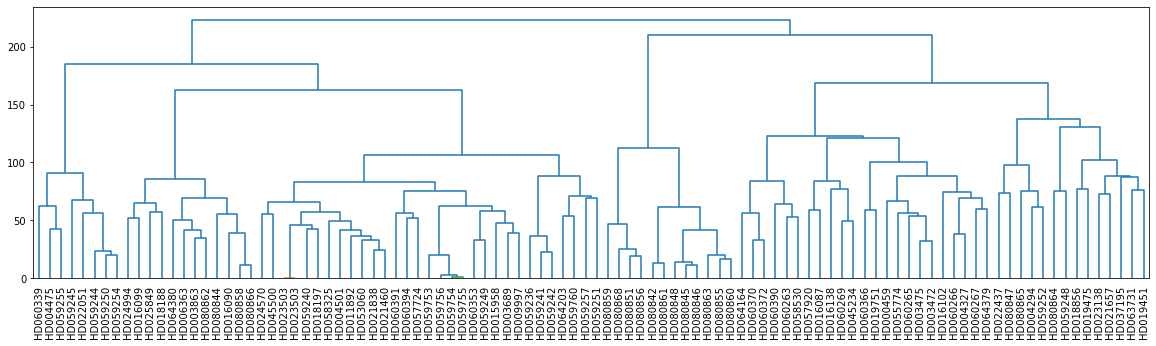

In [64]:
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch

fig, ax  = plt.subplots(figsize=(20, 5))
dendrogram = sch.dendrogram(sch.linkage(result, method='ward'), labels = names, leaf_font_size= 10, orientation = 'top',
                      color_threshold = 2, leaf_rotation=90, ax=ax)
plt.show()